In [1]:
import sys
import os

# If the notebook is in a subfolder (e.g. 'notebooks/'):
# Add the parent directory (the project root) to the path
if '..' not in sys.path:
    sys.path.append('..')

# If CWD is already the root directory, but 'src' is not found:
# Adds the current directory
if '.' not in sys.path:
    sys.path.append('.')

# 0. Import and Functions

In [2]:
# Data preparation packages
import pandas as pd
import numpy as np

# Graphics packages
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz

# Models and metrics packages
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

# Auxiliary functions package
from src.a3data import preditiva

/Users/guedesf/Documents/Data Science/Projetos/a3data/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


## 0.2 Loading Data

In [3]:
df = pd.read_csv('/Users/guedesf/Documents/Data Science/Projetos/a3data/data/curated/Customer-Churn_dummies.csv',
                 sep=';')
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,72,118.75,8672.45,False,True,True,True,False,False,True,...,False,True,False,True,False,True,True,False,False,False
1,71,118.65,8477.60,False,False,False,True,False,False,True,...,False,True,False,True,False,True,True,False,True,False
2,68,118.60,7990.05,False,True,False,True,False,False,True,...,False,True,False,True,False,True,False,False,False,True
3,61,118.60,7365.70,False,False,False,True,False,False,True,...,False,True,False,True,True,False,True,False,True,False
4,67,118.35,7804.15,True,False,False,True,False,False,True,...,False,True,False,True,True,False,True,False,False,False


# 1. Train-Test Split

In [4]:
y = df['Churn']
X = df.drop('Churn', axis=1)

print(f"\nDimensions of X (features): {X.shape}")
print(f"Dimension of y (alvo): {y.shape}")


Dimensions of X (features): (7043, 25)
Dimension of y (alvo): (7043,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42, 
        stratify=y
    )

print("\n--- Division Completed ---")
print(f"X_train format: {X_train.shape}")
print(f"X_test format: {X_test.shape}")
print(f"y_train format: {y_train.shape}")
print(f"y_test format: {y_test.shape}")


--- Division Completed ---
X_train format: (5634, 25)
X_test format: (1409, 25)
y_train format: (5634,)
y_test format: (1409,)


In [6]:
# Check the stratification (Good practice)
print("\nChurn rate verification (stratification):")
print(f"Proportion in the original dataset: {y.mean():.4f}")
print(f"Proportion in the train set:   {y_train.mean():.4f}")
print(f"Proportion in the test set:    {y_test.mean():.4f}")


Churn rate verification (stratification):
Proportion in the original dataset: 0.2654
Proportion in the train set:   0.2654
Proportion in the test set:    0.2654


# 2. Training Models with Best Parameters

## 2.1 Logistic Regression

In [7]:
# Logistic Regression Pipeline (with best params)
best_params_lr = {'model__C': 0.01, 'model__penalty': 'l1', 'model__solver': 'liblinear'}

# Pipeline for Logistic Regression
best_model_lr = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', LogisticRegression(random_state=42, 
                                 class_weight='balanced', 
                                 C=best_params_lr['model__C'],
                                 penalty=best_params_lr['model__penalty'],
                                 solver=best_params_lr['model__solver']))
])

best_model_lr.fit(X_train, y_train)
y_pred_lr = best_model_lr.predict(X_test)


In [8]:
# Optimal Model Evaluation
preditiva.calcula_desempenho(best_model_lr, X_train, y_train, X_test, y_test)

,Treino,Teste,Variação
Acurácia,0.736244,0.724627,-0.02
AUROC,0.842737,0.835702,-0.01
KS,0.542168,0.529587,-0.02
Precision,0.501833,0.488255,-0.03
Recall,0.824080,0.778075,-0.06
F1,0.710368,0.695022,-0.02


## 2.2 Decision Tree

In [9]:
# Decision Tree Classifier (with best params)
best_params_dt = {'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 10, 'criterion': 'entropy'}

# Pipeline for Random Forest
best_model_dt = Pipeline([
    ('model', DecisionTreeClassifier(random_state=42, 
                                     class_weight='balanced',
                                     **best_params_dt))
])

best_model_dt.fit(X_train, y_train)
y_pred_dt = best_model_dt.predict(X_test)

In [10]:
# Optimal Model Evaluation
preditiva.calcula_desempenho(best_model_dt, X_train, y_train, X_test, y_test)

,Treino,Teste,Variação
Acurácia,0.757898,0.751597,-0.01
AUROC,0.857830,0.826391,-0.04
KS,0.551665,0.504219,-0.09
Precision,0.528441,0.522388,-0.01
Recall,0.814047,0.748663,-0.08
F1,0.729133,0.715973,-0.02


## 2.3 Random Forest

In [11]:
# Random Forest Classifier (with best params)
best_params_rf = {'n_estimators': 150, 'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 15}

# Pipeline for Random Forest
best_model_rf =  RandomForestClassifier(random_state=42, 
                                     class_weight='balanced',
                                     **best_params_rf
                                     )

best_model_rf.fit(X_train, y_train)
y_pred_rf = best_model_rf.predict(X_test)

In [12]:
# Optimal Model Evaluation
preditiva.calcula_desempenho(best_model_rf, X_train, y_train, X_test, y_test)

,Treino,Teste,Variação
Acurácia,0.775648,0.756565,-0.02
AUROC,0.874040,0.840533,-0.04
KS,0.590920,0.537743,-0.09
Precision,0.551129,0.528972,-0.04
Recall,0.832776,0.756684,-0.09
F1,0.747537,0.721494,-0.03


## 2.4 XGBoost

In [13]:
# Calculate counts for each class
class_counts = y_train.value_counts()
count_negative = class_counts[0] # Count of 'No Churn'
count_positive = class_counts[1] # Count of 'Yes Churn'

# Calculate the scale_pos_weight
scale_pos_weight_value = count_negative / count_positive

print(f"Negative (0) samples in y_train: {count_negative}")
print(f"Positive (1) samples in y_train: {count_positive}")
print(f"Calculated scale_pos_weight: {scale_pos_weight_value:.4f}")

Negative (0) samples in y_train: 4139
Positive (1) samples in y_train: 1495
Calculated scale_pos_weight: 2.7686


/var/folders/vc/l7hx84k54hbgqbvjd09f9ncr019pzr/T/ipykernel_97031/242617456.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/var/folders/vc/l7hx84k54hbgqbvjd09f9ncr019pzr/T/ipykernel_97031/242617456.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [14]:
# XGBoost Classifier (with best params)
best_params_xgb = {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8}

# Pipeline for XGBoost
best_model_xgb = XGBClassifier(
        random_state=42,
        scale_pos_weight=scale_pos_weight_value,
        n_jobs=-1,                          
        eval_metric='logloss' ,
        **best_params_xgb
        )

best_model_xgb.fit(X_train, y_train)
y_pred_xgb = best_model_xgb.predict(X_test)

In [15]:
# Optimal Model Evaluation
preditiva.calcula_desempenho(best_model_xgb, X_train, y_train, X_test, y_test)

,Treino,Teste,Variação
Acurácia,0.785942,0.761533,-0.03
AUROC,0.892835,0.840768,-0.06
KS,0.620800,0.536371,-0.14
Precision,0.563684,0.535055,-0.05
Recall,0.855518,0.775401,-0.09
F1,0.759441,0.728266,-0.04


# 3. Model Comparisons

In [16]:
# Create a summary table (DataFrame) ---

models = {
    'Logistic Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
}

# Calculate metrics for each model
metrics_data = []
for model_name, y_pred in models.items():
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred) 
                                          
    
    metrics_data.append({
        'Model': model_name,
        'Recall': recall,
        'Precision': precision,
        'F1-Score': f1,
        'AUC-ROC': auc_roc
    })

# Create the DataFrame
metrics_df = pd.DataFrame(metrics_data)
metrics_df = metrics_df.set_index('Model')

print("\n--- Model Comparison Summary (Test Set) ---")
print(metrics_df.sort_values(by='Recall', ascending=False))


--- Model Comparison Summary (Test Set) ---
                       Recall  Precision  F1-Score   AUC-ROC
Model                                                       
Logistic Regression  0.778075   0.488255  0.600000  0.741694
XGBoost              0.775401   0.535055  0.633188  0.765961
Random Forest        0.756684   0.528972  0.622662  0.756603
Decision Tree        0.748663   0.522388  0.615385  0.750660


/var/folders/vc/l7hx84k54hbgqbvjd09f9ncr019pzr/T/ipykernel_97031/2598219297.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



Imagem salva com sucesso em: /Users/guedesf/Documents/Data Science/Projetos/a3data/notebooks/image/feature_importance_XGBoost.png

Saved feature importance plot as 'feature_importance_XGBoost.png'

--- Top 10 Churn Drivers ---
                               Feature  Importance
20                   Contract_Two year    0.257855
9     OnlineBackup_No internet service    0.228469
19                   Contract_One year    0.130291
5          InternetService_Fiber optic    0.099141
6                   InternetService_No    0.066265
0                               tenure    0.028945
18                 StreamingMovies_Yes    0.028452
23      PaymentMethod_Electronic check    0.018836
7   OnlineSecurity_No internet service    0.017267
16                     StreamingTV_Yes    0.016533


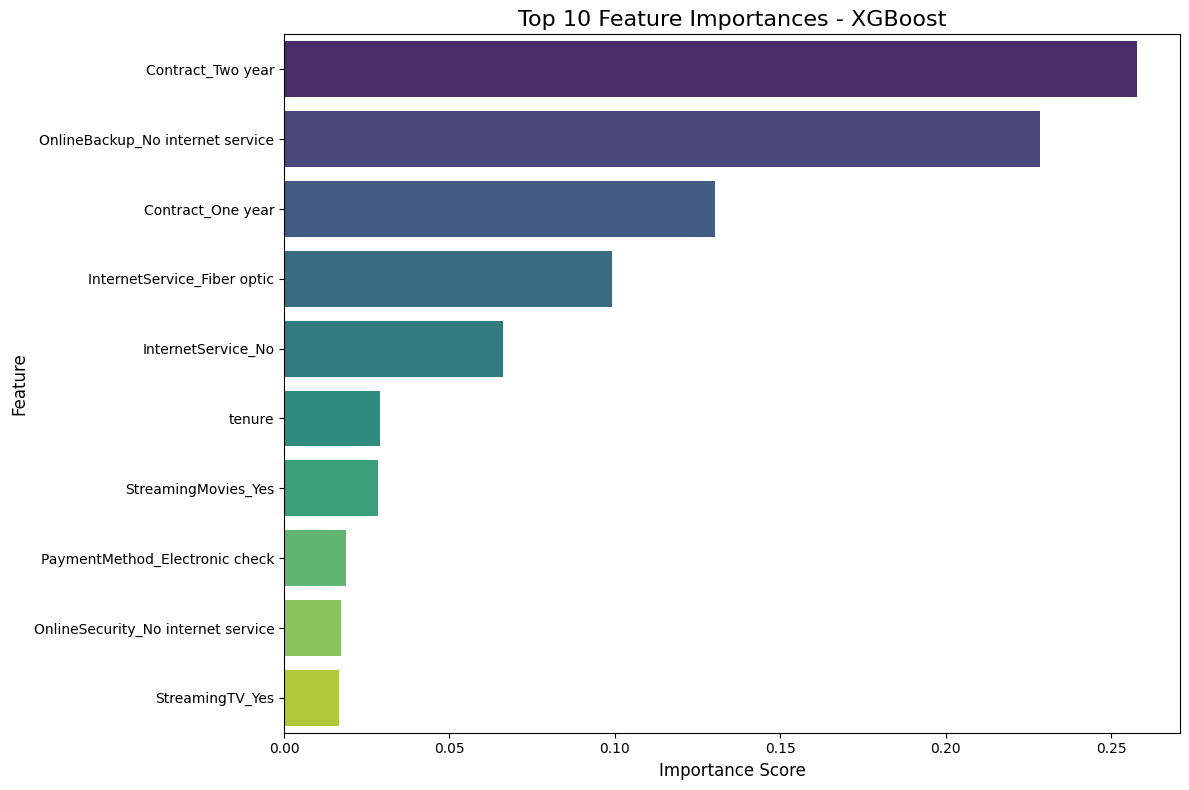

In [17]:
# Feature Importance Analysis for the Winning Model

# Assume your winner is XGBoost
winner_model = best_model_xgb 
winner_model_name = "XGBoost"

# Get feature importances
importances = winner_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title(f'Top 10 Feature Importances - {winner_model_name}', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()


# path preparation steps:
output_image_dir = '/Users/guedesf/Documents/Data Science/Projetos/a3data/notebooks/image'
output_image_filename = f'feature_importance_{winner_model_name}.png'

# function to prepare the full path
image_pah = preditiva.preparar_caminho_salvamento(output_image_dir, output_image_filename)

# save the image
plt.savefig(image_pah)
print(f"Imagem salva com sucesso em: {image_pah}")

print(f"\nSaved feature importance plot as 'feature_importance_{winner_model_name}.png'")
print("\n--- Top 10 Churn Drivers ---")
print(importance_df.head(10))

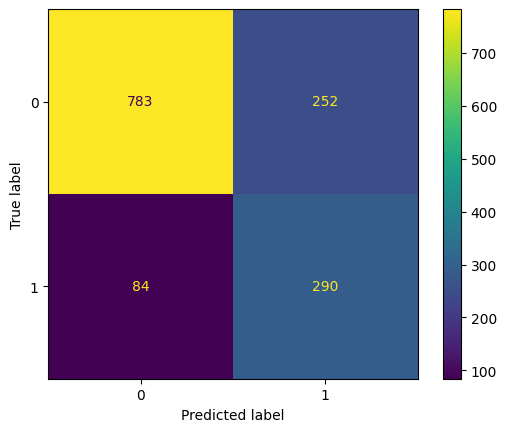

In [18]:
ConfusionMatrixDisplay.from_estimator(
        best_model_xgb,
        X_test,
        y_test  ,
        display_labels=best_model_xgb.classes_
    )